# Caso 1: Sistema de enrollamiento de Cintas

El enrollamiento de cintas magnéticas, cables, fibras textiles y tiras de papel o plástico de un carrete a otro se realiza a menudo empleando un par de motores eléctricos en cuyos ejes se encuentran dos carretes (uno en cada eje) acoplados por el cinturón de material que se está enrollando.


Usualmente en este tipo de sistemas se necesita regular la velocidad de enrollado y la tensión del rollo de material. Para lograr este fin, se puede incorporar una polea de resorte al sistema de carretes. Así, la deflexión del resorte indica la tensión del cinturón de material, mientras que la velocidad de la polea está relacionada con la velocidad del cinturón entre los dos carretes. Una representación esquemática del sistema indicado se muestra en la Figura \ref{fig:esquemaenrollado}.


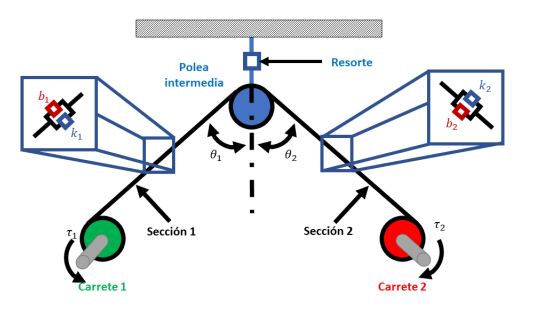


Text(0, 0.5, 'Elongación máxima en x3 [m]')

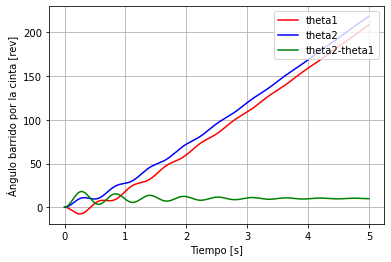

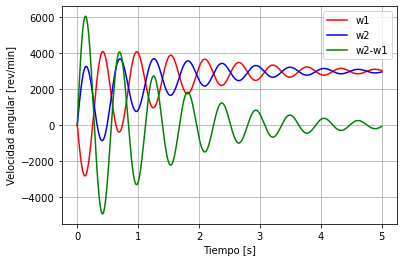

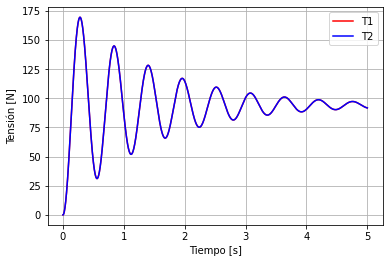

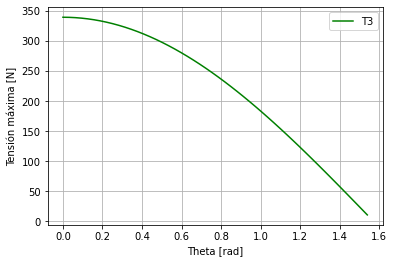

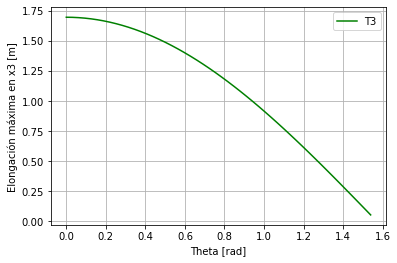

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def funct(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1, theta2, omega1, omega2): 
    x1 = r2*theta2-r1*theta1 
    x2 = r2*theta2-r1*theta1 
    dx1 = r2*omega2-r1*omega1
    dx2 = r2*omega2-r1*omega1
    T1 = beta1*dx1 + k1*x1
    T2 = beta2*dx2 + k2*x2
    alpha1 = (-tao1-b1*omega1+r1*T1)/I1
    alpha2 = (tao2-b2*omega2-r2*T2)/I2
    return np.array([omega1, omega2, alpha1, alpha2])

def rk4(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1, theta2, omega1, omega2, dt):
    kr1 = funct(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1, theta2, omega1, omega2)
    kr2 = funct(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1+0.5*dt*kr1[0], theta2+0.5*dt*kr1[1], omega1+0.5*dt*kr1[2], omega2+0.5*dt*kr1[3])
    kr3 = funct(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1+0.5*dt*kr2[0], theta2+0.5*dt*kr2[1], omega1+0.5*dt*kr2[2], omega2+0.5*dt*kr2[3])
    kr4 = funct(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1+dt*kr3[0], theta2+dt*kr3[1], omega1+dt*kr3[2], omega2+dt*kr3[3])
    fi_in = [theta1, theta2, omega1, omega2]
    fi_out = fi_in + dt*(kr1+2*kr2+2*kr3+kr4)/6
    return fi_out

# Variables del modelo físico

I1 = 8e-4*0.8
I2 = 8e-4
tao1 = 3.136*0.8
tao2 = 3.136
r1 = 0.03
r2 = 0.03
k1 = 50
k2 = 50
k3 = 200
b1 = 0.001
b2 = 0.001
beta1 = 0.2*0
beta2 = 0.2*0
omega1max = 100*np.pi
omega2max = 100*np.pi

# Variables del modelo matemático-computacional

n = 2
tf = 5
dt = 1e-3
it = int(tf/dt)

t = np.zeros(it+1)
theta1 = np.zeros(it+1)
theta2 = np.zeros(it+1)
omega1 = np.zeros(it+1)
omega2 = np.zeros(it+1)

theta1[0] = 0
theta2[0] = 0
omega1[0] = 0
omega2[0] = 0

for i in range(1,it+1):
    t[i] = t[i-1] + dt
    [theta1[i], theta2[i], omega1[i], omega2[i]] = rk4(tao1, tao2, r1, r2, I1, I2, beta1, beta2, k1, k2, b1, b2, theta1[i-1], theta2[i-1], omega1[i-1], omega2[i-1], dt)    


T1 = beta1*(r2*omega2-r1*omega1) + k1*(r2*theta2-r1*theta1)

T2 = beta2*(r2*omega2-r1*omega1) + k2*(r2*theta2-r1*theta1)

theta = np.arange(0, np.pi/2, np.pi/100)

T3 = max(T1+T2)*np.cos(theta)

x3 = T3/k3

plt.figure(1)

plt.grid()
plt.plot(t, theta1/(2*np.pi), "-r", label="theta1")     
plt.plot(t, theta2/(2*np.pi), "-b", label="theta2")
plt.plot(t, (theta2-theta1)/(2*np.pi), "-g", label="theta2-theta1")
plt.legend(loc="upper right")
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo barrido por la cinta [rev]")

plt.figure(2)

plt.grid()
plt.plot(t, omega1*30/np.pi, "-r", label="w1")     
plt.plot(t, omega2*30/np.pi, "-b", label="w2")
plt.plot(t, (omega2-omega1)*30/np.pi, "-g", label="w2-w1")
plt.legend(loc="upper right")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad angular [rev/min]")

plt.figure(3)

plt.grid()
plt.plot(t, T1, "-r", label="T1")     
plt.plot(t, T2, "-b", label="T2")
plt.legend(loc="upper right")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [N]")

plt.figure(4)

plt.grid()
plt.plot(theta, T3, "-g", label="T3")
plt.legend(loc="upper right")
plt.xlabel("Theta [rad]")
plt.ylabel("Tensión máxima [N]")

plt.figure(5)

plt.grid()
plt.plot(theta, x3, "-g", label="T3")
plt.legend(loc="upper right")
plt.xlabel("Theta [rad]")
plt.ylabel("Elongación máxima en x3 [m]")